In [1]:
#https://matplotlib.org/2.0.2/examples/index.html

In [2]:
#Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file="all_data.csv"
data=pd.read_csv(file)
#data

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#remove Maryland, none and united states rows
data=data.loc[(data['Zip Code']!="Maryland")&(data['Zip Code']!="None")&
                              (data['Zip Code']!="United States"),:]
#data.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Tables

### Summary Statistics Table

In [5]:
print(data.columns)
summary=data[['Fine Amount','Total Paid']]
summary_stats=summary.describe()
summary_stats
summary_stats["Fine Amount"] = summary_stats["Fine Amount"].map("{0:,.2f}".format)
summary_stats["Total Paid"] = summary_stats["Total Paid"].map("{0:,.2f}".format)
summary_stats

Index(['Unnamed: 0', 'Zip Code', 'Issue Date', 'Issue Time', 'Location',
       'Violation', 'Fine Amount', 'Total Paid', 'Latitude', 'Longitude',
       'Population', 'Per Capita Income', 'Poverty Rate',
       'Percent of Residents w/Bachelor's Degree or Higher',
       'Percent Minority Population'],
      dtype='object')


,Fine Amount,Total Paid
count,"1,170,339.00","1,170,339.00"
mean,134.42,50.81
std,67.21,73.11
min,50.00,0.00
25%,100.00,0.00
50%,100.00,0.00
75%,150.00,100.00
max,"1,000.00","2,000.00"


In [38]:
#Exporting to excel
summary_stats_xport=pd.DataFrame(summary_stats)
summary_stats_xport
summary_stats_xport.to_excel('Results/Summary_Statistics.xlsx', index = True, header=True)

### Table of Total tickets issued/Fines/Revenue by month

In [7]:
data['Date']=data.iloc[:,2].str.slice(stop=10)
data['Month']=data['Date'].str.slice(start=5, stop=-3)
data['Ticket Count']=1
select=data[['Month','Fine Amount','Total Paid','Ticket Count']]
by_month=select.groupby(['Month']).sum()
by_month["Fine Amount"] = by_month["Fine Amount"].map("${0:,.2f}".format)
by_month['Total Paid'] = by_month["Total Paid"].map("${0:,.2f}".format)
by_month['Ticket Count'] = by_month['Ticket Count'].map("{0:,.2f}".format)
by_month


,Fine Amount,Total Paid,Ticket Count
Month,,,
01,"$9,380,150.00","$6,675,493.00","83,875.00"
02,"$8,611,200.00","$5,892,642.00","76,748.00"
03,"$10,441,600.00","$6,314,396.00","93,148.00"
04,"$10,802,700.00","$4,655,691.00","96,461.00"
05,"$10,882,250.00","$4,161,585.00","97,217.00"
06,"$19,907,000.00","$6,996,460.00","133,124.00"
07,"$16,001,300.00","$4,915,685.00","106,637.00"
08,"$22,544,750.00","$6,065,931.00","139,655.00"
09,"$13,664,200.00","$4,441,552.00","94,184.00"


In [37]:
#Exporting to excel
by_month_xport=pd.DataFrame(by_month)
by_month_xport
by_month_xport.to_excel('Results/by_month.xlsx', index = True, header=True)


# Plots and Figures

### Traffic Violations by Camera - Top 10 Cameras by Tickets Issued

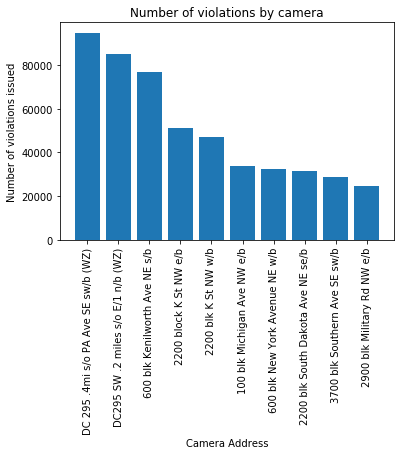

In [9]:
# Read traffic_cams_final into a dataframe
traffic_cams_final_df = pd.read_csv('traffic_cams_final.csv')
# Groupby location & count number of violations 
traffic_cams_final_grpby = traffic_cams_final_df.groupby('Location')['Violation'].count().reset_index()
traffic_cams_final_sort = traffic_cams_final_grpby.sort_values(by = 'Violation', ascending = False)
# Capture 10 highest and 10 lowest violation issuing cameras
traffic_cams_final_top10 = traffic_cams_final_sort.head(10)
traffic_cams_final_bottom10 = traffic_cams_final_sort.tail(10)
#bar graph top 10 cameras
x = traffic_cams_final_top10['Location']
y = traffic_cams_final_top10['Violation']
plt.bar(x, y)
plt.title('Number of violations by camera')
plt.xticks(rotation = '90')
plt.xlabel('Camera Address')
plt.ylabel('Number of violations issued')
plt.savefig("Images/number_violations_by_camera_top10.png", dpi=300, bbox_inches='tight')
plt.show()

### Traffic Violations by Camera - Bottom 10 Cameras by Tickets Issued

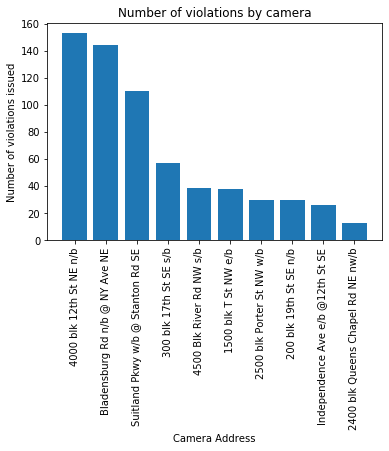

In [10]:
# Bar graph bottom 10 cameras
x = traffic_cams_final_bottom10['Location']
y = traffic_cams_final_bottom10['Violation']
plt.bar(x, y)
plt.title('Number of violations by camera')
plt.xticks(rotation = '90')
plt.xlabel('Camera Address')
plt.ylabel('Number of violations issued')
plt.savefig("Images/number_violations_by_camera_bottom10.png", dpi=300, bbox_inches='tight')
plt.show()

### Number of Citations Issued By Offense

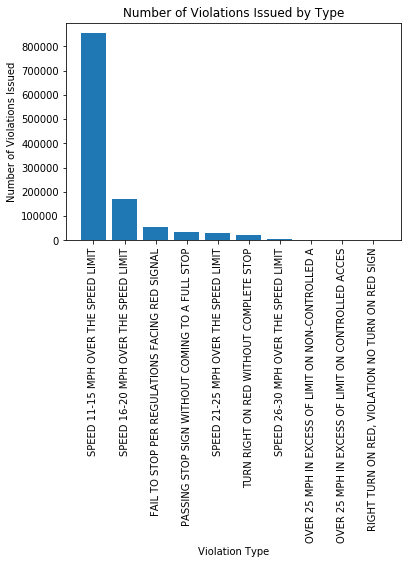

In [11]:
# Groupby violation type & count locations 
traffic_cams_final_grpby = traffic_cams_final_df.groupby('Violation')['Location'].count().reset_index()
traffic_cams_final_sort = traffic_cams_final_grpby.sort_values(by = 'Location', ascending = False)
# Capture highest 10 violations
traffic_cams_final_top10 = traffic_cams_final_sort.head(10)
# Bar graph highest 10 issued violation types
x = traffic_cams_final_top10['Violation']
y = traffic_cams_final_top10['Location']
plt.bar(x, y)
plt.title('Number of Violations Issued by Type')
plt.xticks(rotation = '90')
plt.xlabel('Violation Type')
plt.ylabel('Number of Violations Issued')
plt.savefig("Images/number_violations_by_type.png", dpi=300, bbox_inches='tight')
plt.show()

### Traffic violations by zip code

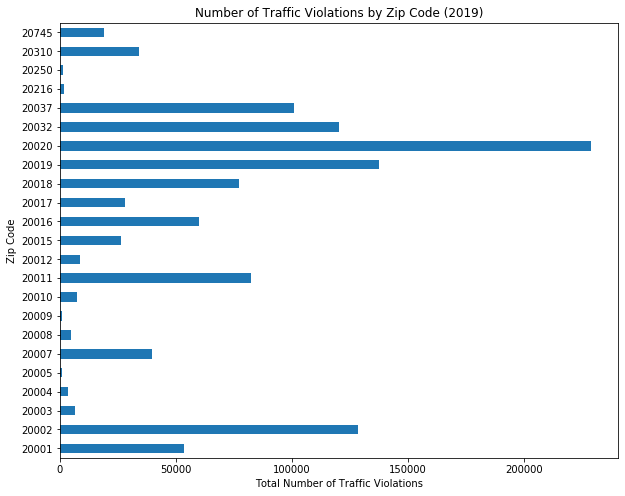

In [12]:
grp_by_zip=data.groupby(['Zip Code']).count()
viol_by_zip=grp_by_zip["Violation"]


#Bar chart of violations per zip code
viol_by_zip.plot(kind='barh',figsize=(10,8))

plt.title("Number of Traffic Violations by Zip Code (2019)")
plt.ylabel("Zip Code")
plt.xlabel("Total Number of Traffic Violations")

plt.savefig("Images/violationByZip.png")



### Fine amount vs Total Paid by zip code

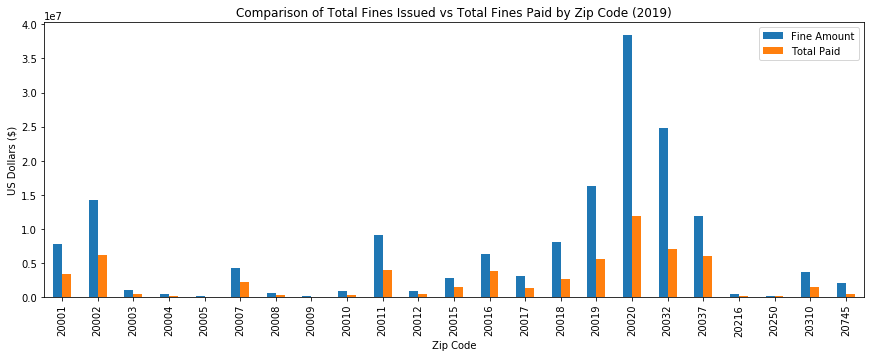

In [13]:
select=data[['Zip Code','Fine Amount','Total Paid']]
select_grp=select.groupby('Zip Code').sum()

select_grp.plot(kind='bar', figsize=(12,5))

plt.tight_layout()

plt.title("Comparison of Total Fines Issued vs Total Fines Paid by Zip Code (2019)")
plt.ylabel("US Dollars ($)")
plt.xlabel("Zip Code")

plt.savefig("Images/cost_revenue_by_zip.png")

### Number of violations by day of the month

In [14]:
#Line graph of tickets issued by day of the month (This graph will have one line for each month.)
#select data for each month and group by day
#each data point should be a day of the month (1 to 31)

####################### Extracting data #########################################################
date_time = pd.Series(data.iloc[:,2])
date=date_time.str.slice(stop=10)
day=date.str.slice(start=-2)
month=date.str.slice(start=5, stop=-3)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html

#print(date_time)
df=pd.DataFrame({'day of the month':day,"month":month})

#filtering by months
january=df.loc[df['month']=='01',:]
jan_violations=january.groupby(['day of the month']).count()
jan_violations=jan_violations.rename(columns={'month':'No. of violations'})

february=df.loc[df['month']=='02',:]
feb_violations=february.groupby(['day of the month']).count()
feb_violations=feb_violations.rename(columns={'month':'No. of violations'})

march=df.loc[df['month']=='03',:]
mar_violations=march.groupby(['day of the month']).count()
mar_violations=mar_violations.rename(columns={'month':'No. of violations'})

april=df.loc[df['month']=='04',:]
apr_violations=april.groupby(['day of the month']).count()
apr_violations=apr_violations.rename(columns={'month':'No. of violations'})

may=df.loc[df['month']=='05',:]
may_violations=may.groupby(['day of the month']).count()
may_violations=may_violations.rename(columns={'month':'No. of violations'})

june=df.loc[df['month']=='06',:]
june_violations=june.groupby(['day of the month']).count()
june_violations=june_violations.rename(columns={'month':'No. of violations'})

july=df.loc[df['month']=='07',:]
july_violations=july.groupby(['day of the month']).count()
july_violations=july_violations.rename(columns={'month':'No. of violations'})

august=df.loc[df['month']=='08',:]
aug_violations=august.groupby(['day of the month']).count()
aug_violations=aug_violations.rename(columns={'month':'No. of violations'})

september=df.loc[df['month']=='09',:]
sep_violations=september.groupby(['day of the month']).count()
sep_violations=sep_violations.rename(columns={'month':'No. of violations'})

october=df.loc[df['month']=='10',:]
oct_violations=october.groupby(['day of the month']).count()
oct_violations=oct_violations.rename(columns={'month':'No. of violations'})

november=df.loc[df['month']=='11',:]
nov_violations=november.groupby(['day of the month']).count()
nov_violations=nov_violations.rename(columns={'month':'No. of violations'})

december=df.loc[df['month']=='12',:]
dec_violations=december.groupby(['day of the month']).count()
dec_violations=dec_violations.rename(columns={'month':'No. of violations'})



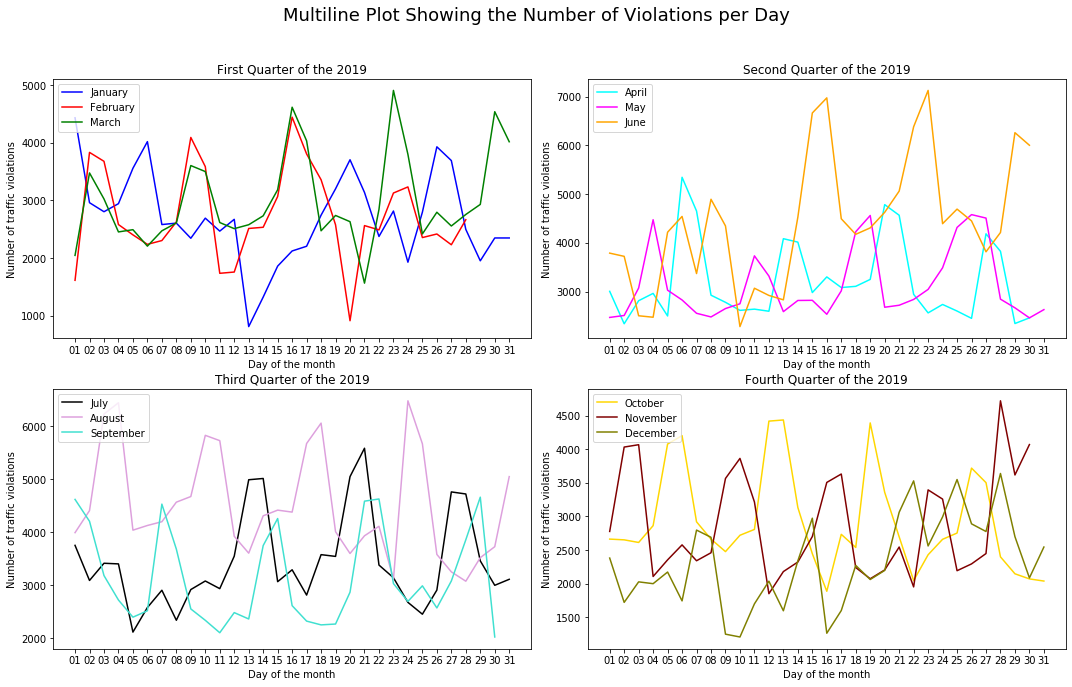

In [15]:
##########################################   plotting the multiline tickets issued by day   #############################
fig,axs = plt.subplots(nrows=2, ncols=2)
title=fig.suptitle('Multiline Plot Showing the Number of Violations per Day',fontsize=18)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.xlabel="Day of the Month"

axs[0, 0].set_title('First Quarter of the 2019')
jan,=axs[0, 0].plot(jan_violations,color='blue',label='January')
feb,=axs[0, 0].plot(feb_violations,color='red',label='February')
mar,=axs[0, 0].plot(mar_violations,color='green',label='March')
axs[0,0].legend(loc='upper left', bbox_to_anchor=(0, 1))

axs[0, 1].set_title('Second Quarter of the 2019')
apr,=axs[0, 1].plot(apr_violations,color='cyan',label='April')
may,=axs[0, 1].plot(may_violations,color='magenta',label='May')
jun,=axs[0, 1].plot(june_violations,color='orange',label='June')
axs[0,1].legend(loc='upper left', bbox_to_anchor=(0, 1))

axs[1, 0].set_title('Third Quarter of the 2019')
jul,=axs[1, 0].plot(july_violations,color='black',label='July')
aug,=axs[1, 0].plot(aug_violations,color='plum',label='August')
sep,=axs[1, 0].plot(sep_violations,color='turquoise',label='September')
axs[1,0].legend(loc='upper left', bbox_to_anchor=(0, 1))

axs[1, 1].set_title('Fourth Quarter of the 2019')
octo,=axs[1, 1].plot(oct_violations,color='gold',label='October')
nov,=axs[1, 1].plot(nov_violations,color='maroon',label='November')
dec,=axs[1, 1].plot(dec_violations,color='olive',label='December')
axs[1,1].legend(loc='upper left', bbox_to_anchor=(0, 1))


for ax in axs.flat:
    ax.set(xlabel='Day of the month', ylabel='Number of traffic violations')

fig.tight_layout()
title.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.show()

fig.savefig("Images/violations_per_day.png")

### Map of ticket locations

In [16]:
#https://python-graph-gallery.com/288-map-background-with-folium/

In [18]:
!pip install folium
import folium
import pandas as pd
from folium import plugins

     |████████████████████████████████| 102kB 4.4MB/s ta 0:00:011


In [19]:
#group by lat long and value shouls be count
data.dropna(inplace = True) 
data['Ticket Count']=1
address=data[['Latitude','Longitude','Location','Ticket Count']]

lat_lon_grp=address.groupby(['Latitude','Longitude','Location']).count()

marker_data=lat_lon_grp.reset_index()

locations = marker_data[['Latitude','Longitude']]
locations
locationlist = locations.values.tolist()
len(locationlist)

labels = marker_data['Location'].values.tolist()


In [20]:
# Make an empty map
m = folium.Map(location=[38.9, -77.05], tiles="OpenStreetMap", zoom_start=11)

In [21]:
#marker_data.dtypes

In [22]:
#https://georgetsilva.github.io/posts/mapping-points-with-folium/
#https://github.com/python-visualization/folium/issues/726
for point in range(len(locationlist)):
    folium.Marker(locationlist[point], popup=labels[point]).add_to(m)
m

In [23]:
m.save("Images/camera_locations.html")

### Heatmap of number of violations by location

In [34]:
!pip install -U jupyter
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py gmaps
import gmaps
import pandas as pd

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

Requirement already up-to-date: jupyter in /opt/anaconda3/lib/python3.7/site-packages (1.0.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: OK


In [35]:
locations
len(locations)


133

In [36]:
#documentatin -- https://jupyter-gmaps.readthedocs.io/en/latest/api.html
#import widget that allows map to be exported to to html
from ipywidgets.embed import embed_minimal_html
locations = marker_data[['Latitude', 'Longitude']]
weights=marker_data['Ticket Count']


# Plot Heatmap
# map types ['ROADMAP', 'HYBRID', 'TERRAIN', 'SATELLITE']
fig = gmaps.figure(map_type='ROADMAP',center=(38.9, -77.05),zoom_level=11) 

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weights,max_intensity=0,point_radius = 30)

# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))